### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [3]:
print(tienda.columns)

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')


In [4]:
print(tienda.shape)  # Devuelve una tupla (filas, columnas)

(2359, 12)


#1. Análisis de facturación



In [5]:
import pandas as pd

# Leer los datos
urls = [url, url2, url3, url4]
tiendas = [pd.read_csv(url) for url in urls]

# Calcular la facturación por tienda
for i, tienda in enumerate(tiendas):
    facturacion_tienda = tienda["Precio"].sum()
    print(f"Facturación Tienda {i+1}: ${facturacion_tienda:.2f}")

# Facturación total de todas las tiendas
total_facturacion = sum(tienda["Precio"].sum() for tienda in tiendas)
print(f"\nFacturación total de todas las tiendas: ${total_facturacion:.2f}")

Facturación Tienda 1: $1150880400.00
Facturación Tienda 2: $1116343500.00
Facturación Tienda 3: $1098019600.00
Facturación Tienda 4: $1038375700.00

Facturación total de todas las tiendas: $4403619200.00


# 2. Ventas por categoría

In [7]:
import pandas as pd

# Leer los datos
urls = [url, url2, url3, url4]
tiendas = [pd.read_csv(url) for url in urls]

# Calcular ventas por categoría en cada tienda
for i, tienda in enumerate(tiendas):
    ventas_por_categoria = tienda.groupby("Categoría del Producto")["Precio"].sum()
    print(f"\nVentas por categoría en Tienda {i+1}:")
    print(ventas_por_categoria)

# Ventas totales por categoría considerando todas las tiendas
ventas_totales_por_categoria = pd.concat(tiendas).groupby("Categoría del Producto")["Precio"].sum()

print("\nVentas totales por categoría (todas las tiendas combinadas):")
print(ventas_totales_por_categoria)


Ventas por categoría en Tienda 1:
Categoría del Producto
Artículos para el hogar     12698400.0
Deportes y diversión        39290000.0
Electrodomésticos          363685200.0
Electrónicos               429493500.0
Instrumentos musicales      91299000.0
Juguetes                    17995700.0
Libros                       8784900.0
Muebles                    187633700.0
Name: Precio, dtype: float64

Ventas por categoría en Tienda 2:
Categoría del Producto
Artículos para el hogar     14746900.0
Deportes y diversión        34744500.0
Electrodomésticos          348567800.0
Electrónicos               410831100.0
Instrumentos musicales     104990300.0
Juguetes                    15945400.0
Libros                      10091200.0
Muebles                    176426300.0
Name: Precio, dtype: float64

Ventas por categoría en Tienda 3:
Categoría del Producto
Artículos para el hogar     15060000.0
Deportes y diversión        35593100.0
Electrodomésticos          329237900.0
Electrónicos               

# 3. Calificación promedio de la tienda


In [8]:
import pandas as pd

# Leer los datos
urls = [url, url2, url3, url4]
tiendas = [pd.read_csv(url) for url in urls]

# Calcular el promedio de calificación en cada tienda
for i, tienda in enumerate(tiendas):
    promedio_calificacion = tienda["Calificación"].mean()
    print(f"Promedio de calificación en Tienda {i+1}: {promedio_calificacion:.2f}")

# Promedio general de calificación considerando todas las tiendas
promedio_total_calificacion = pd.concat(tiendas)["Calificación"].mean()

print(f"\nPromedio total de calificación en todas las tiendas: {promedio_total_calificacion:.2f}")

Promedio de calificación en Tienda 1: 3.98
Promedio de calificación en Tienda 2: 4.04
Promedio de calificación en Tienda 3: 4.05
Promedio de calificación en Tienda 4: 4.00

Promedio total de calificación en todas las tiendas: 4.01


# 4. Productos más y menos vendidos

In [9]:
import pandas as pd

# Leer los datos
urls = [url, url2, url3, url4]
tiendas = [pd.read_csv(url) for url in urls]

# Identificar productos más y menos vendidos en cada tienda
for i, tienda in enumerate(tiendas):
    ventas_por_producto = tienda.groupby("Producto")["Precio"].sum()

    producto_mas_vendido = ventas_por_producto.idxmax()
    producto_menos_vendido = ventas_por_producto.idxmin()

    print(f"\nTienda {i+1}:")
    print(f"📈 Producto más vendido: {producto_mas_vendido} (${ventas_por_producto.max():.2f})")
    print(f"📉 Producto menos vendido: {producto_menos_vendido} (${ventas_por_producto.min():.2f})")

# Identificar los productos más y menos vendidos considerando todas las tiendas
ventas_totales_por_producto = pd.concat(tiendas).groupby("Producto")["Precio"].sum()

producto_mas_vendido_total = ventas_totales_por_producto.idxmax()
producto_menos_vendido_total = ventas_totales_por_producto.idxmin()

print("\n📊 Productos más y menos vendidos en todas las tiendas:")
print(f"📈 Producto más vendido: {producto_mas_vendido_total} (${ventas_totales_por_producto.max():.2f})")
print(f"📉 Producto menos vendido: {producto_menos_vendido_total} (${ventas_totales_por_producto.min():.2f})")


Tienda 1:
📈 Producto más vendido: TV LED UHD 4K ($142150200.00)
📉 Producto menos vendido: Cuerda para saltar ($652800.00)

Tienda 2:
📈 Producto más vendido: Iphone 15 ($113225800.00)
📉 Producto menos vendido: Cubo mágico 8x8 ($643600.00)

Tienda 3:
📈 Producto más vendido: Refrigerador ($99889700.00)
📉 Producto menos vendido: Cubo mágico 8x8 ($640400.00)

Tienda 4:
📈 Producto más vendido: Iphone 15 ($96697500.00)
📉 Producto menos vendido: Cuerda para saltar ($704800.00)

📊 Productos más y menos vendidos en todas las tiendas:
📈 Producto más vendido: TV LED UHD 4K ($432489600.00)
📉 Producto menos vendido: Cubo mágico 8x8 ($2729300.00)


# 5. Envío promedio por tienda

In [10]:
import pandas as pd

# Leer los datos
urls = [url, url2, url3, url4]
tiendas = [pd.read_csv(url) for url in urls]

# Calcular el costo promedio de envío en cada tienda
for i, tienda in enumerate(tiendas):
    costo_promedio_envio = tienda["Costo de envío"].mean()
    print(f"Costo promedio de envío en Tienda {i+1}: ${costo_promedio_envio:.2f}")

# Calcular el costo promedio de envío considerando todas las tiendas
costo_promedio_total_envio = pd.concat(tiendas)["Costo de envío"].mean()
print(f"\nCosto promedio de envío en todas las tiendas: ${costo_promedio_total_envio:.2f}")

Costo promedio de envío en Tienda 1: $26018.61
Costo promedio de envío en Tienda 2: $25216.24
Costo promedio de envío en Tienda 3: $24805.68
Costo promedio de envío en Tienda 4: $23459.46

Costo promedio de envío en todas las tiendas: $24875.15


**#VISUALIZACIÓN**

1. ANÁLISIS DE FACTURACIÓN

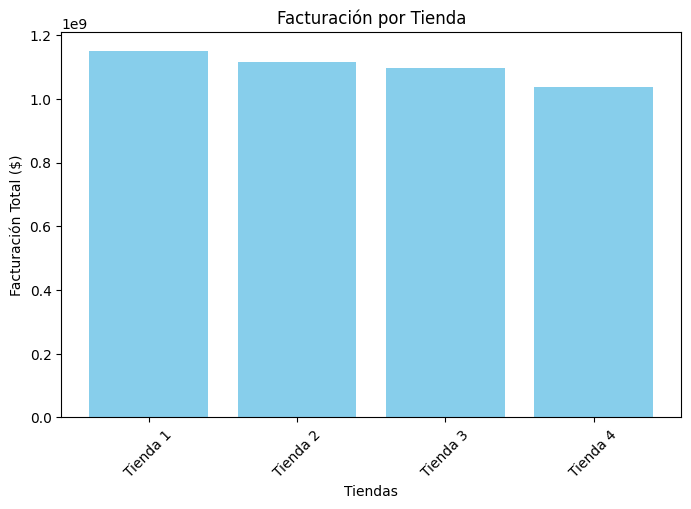

In [11]:
import matplotlib.pyplot as plt

# Crear listas con nombres de tiendas y facturación
nombres_tiendas = [f"Tienda {i+1}" for i in range(len(tiendas))]
facturacion_tiendas = [tienda["Precio"].sum() for tienda in tiendas]

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, facturacion_tiendas, color="skyblue")
plt.xlabel("Tiendas")
plt.ylabel("Facturación Total ($)")
plt.title("Facturación por Tienda")
plt.xticks(rotation=45)
plt.show()

2. VENTAS POR CATEGORIA

2.1 VENTAS POR CATEGORIA TODAS LAS TIENDAS

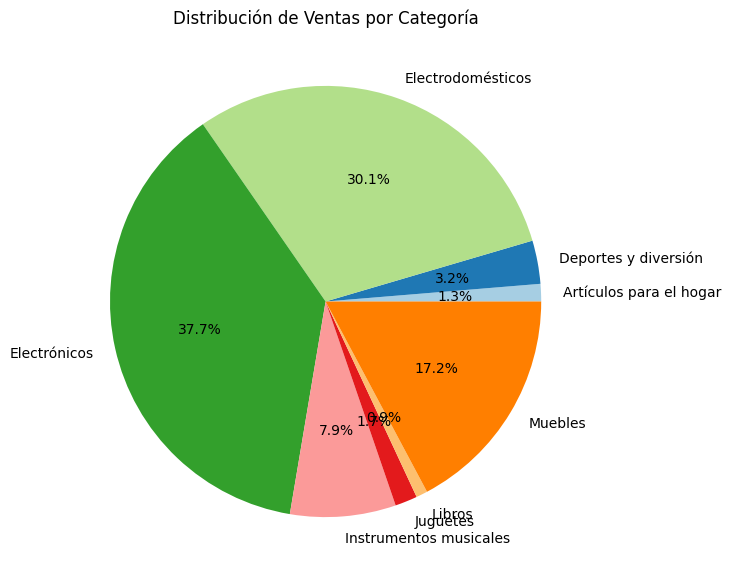

In [12]:
# Agrupar ventas totales por categoría
ventas_totales_por_categoria = pd.concat(tiendas).groupby("Categoría del Producto")["Precio"].sum()

# Crear gráfico circular
plt.figure(figsize=(7, 7))
plt.pie(ventas_totales_por_categoria, labels=ventas_totales_por_categoria.index, autopct="%1.1f%%", colors=plt.cm.Paired.colors)
plt.title("Distribución de Ventas por Categoría")
plt.show()

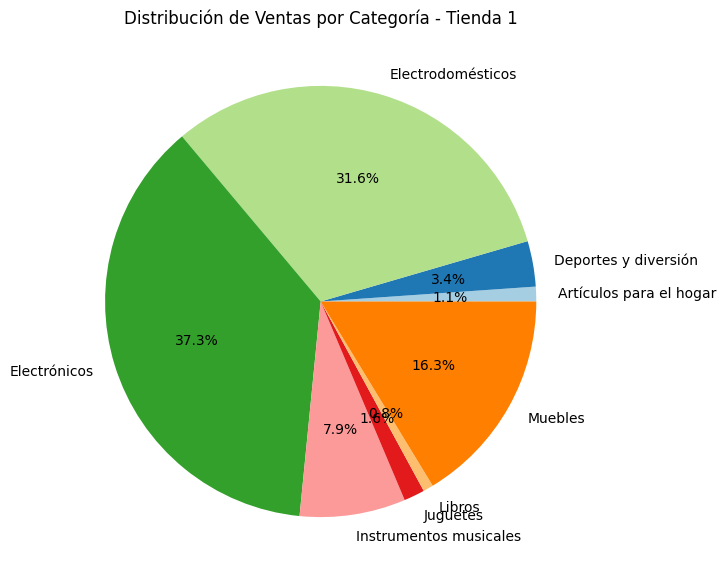

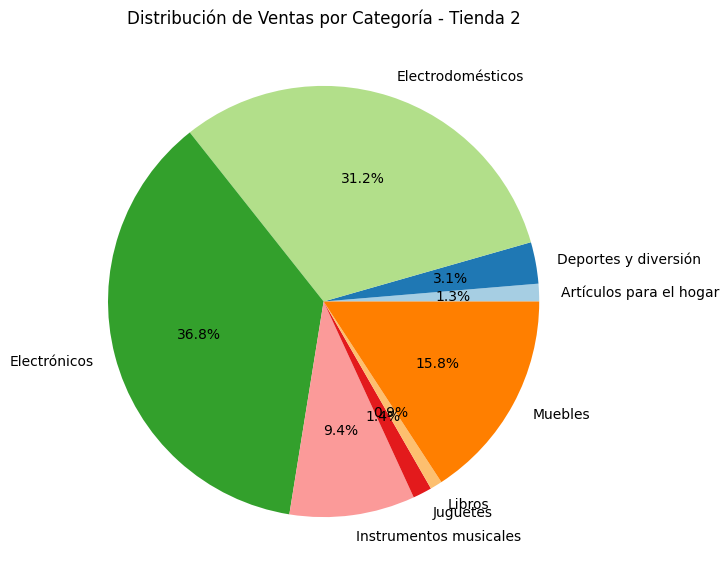

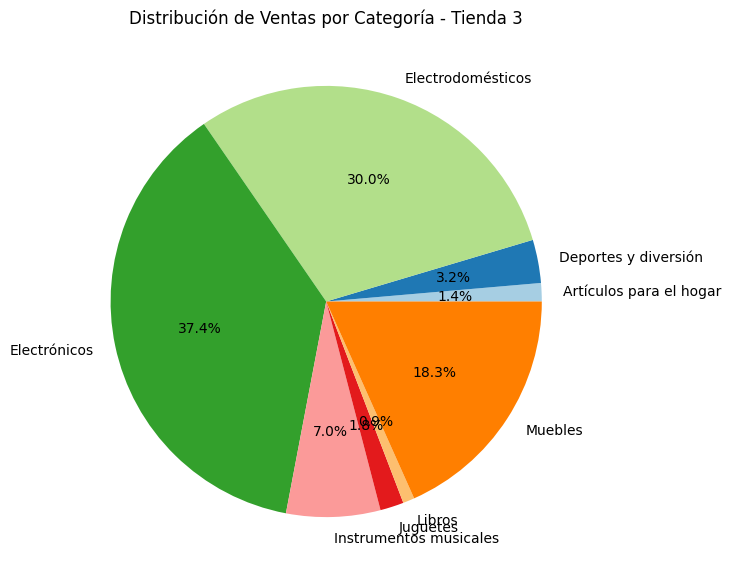

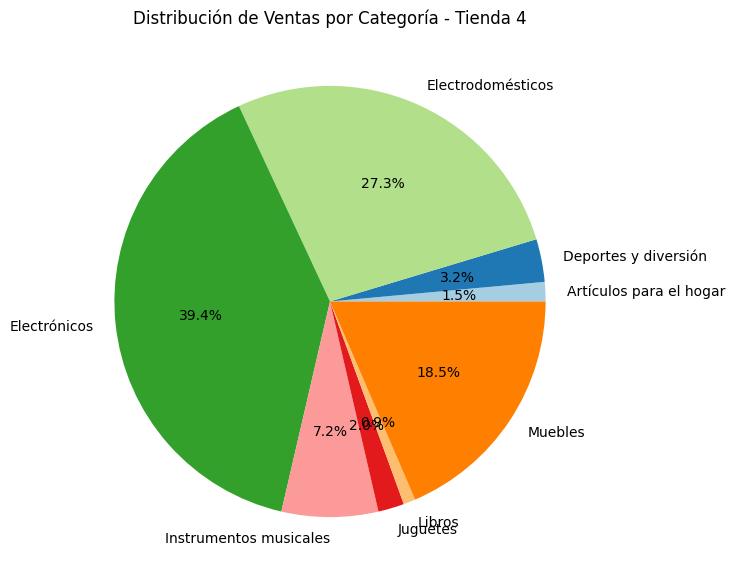

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer los datos
urls = [url, url2, url3, url4]
tiendas = [pd.read_csv(url) for url in urls]

# Graficar las ventas por categoría en cada tienda
for i, tienda in enumerate(tiendas):
    ventas_por_categoria = tienda.groupby("Categoría del Producto")["Precio"].sum()

    # Crear gráfico de pastel para cada tienda
    plt.figure(figsize=(7, 7))
    plt.pie(ventas_por_categoria, labels=ventas_por_categoria.index, autopct="%1.1f%%", colors=plt.cm.Paired.colors)
    plt.title(f"Distribución de Ventas por Categoría - Tienda {i+1}")
    plt.show()

3. PROMEDIO DE CALIFICACIÓN POR TIENDAS

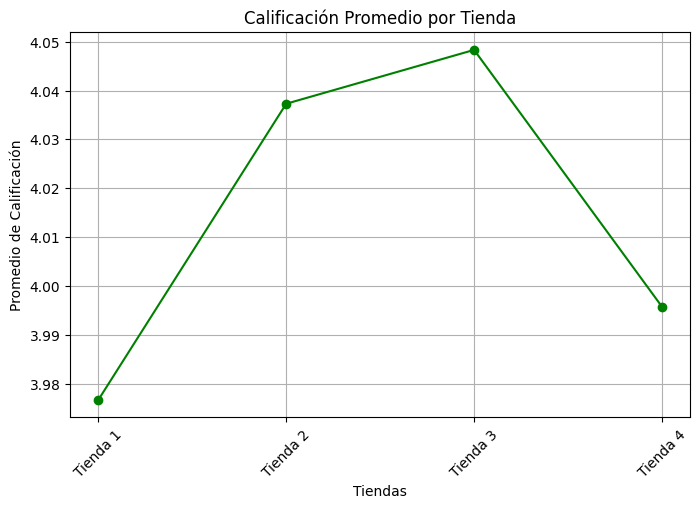

In [14]:
# Obtener promedios de calificación por tienda
promedios_calificacion = [tienda["Calificación"].mean() for tienda in tiendas]

# Crear gráfico de líneas
plt.figure(figsize=(8, 5))
plt.plot(nombres_tiendas, promedios_calificacion, marker="o", linestyle="-", color="green")
plt.xlabel("Tiendas")
plt.ylabel("Promedio de Calificación")
plt.title("Calificación Promedio por Tienda")
plt.xticks(rotation=45)
plt.grid()
plt.show()

4. PRODUCTOS MÁS Y MENOS VENDIDOS

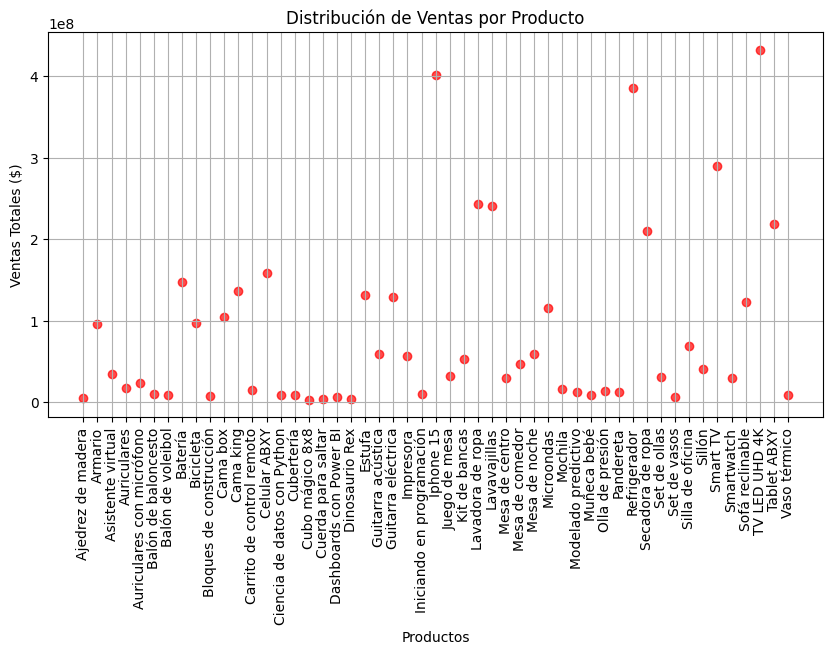

In [15]:
# Obtener datos de ventas totales por producto
ventas_totales_por_producto = pd.concat(tiendas).groupby("Producto")["Precio"].sum()

# Crear gráfico de dispersión
plt.figure(figsize=(10, 5))
plt.scatter(ventas_totales_por_producto.index, ventas_totales_por_producto, color="red", alpha=0.7)
plt.xlabel("Productos")
plt.ylabel("Ventas Totales ($)")
plt.title("Distribución de Ventas por Producto")
plt.xticks(rotation=90)
plt.grid()
plt.show()

5. COSTO PROMEDIO DEL ENVIO POR TIENDA

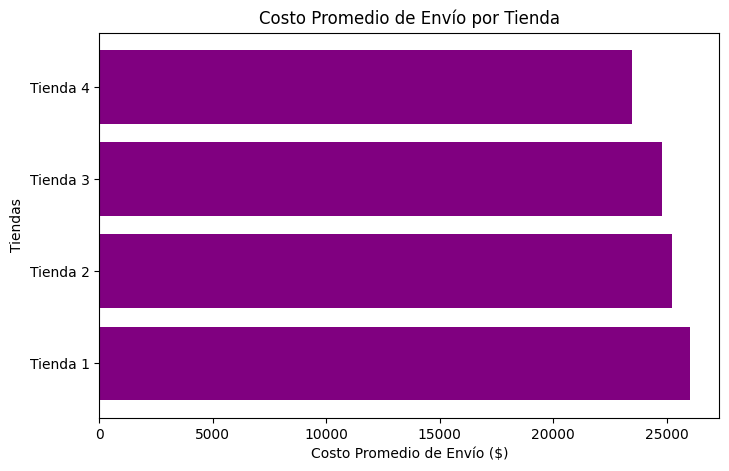

In [16]:
# Obtener costos promedio de envío por tienda
costo_promedio_envio = [tienda["Costo de envío"].mean() for tienda in tiendas]

# Crear gráfico de barras horizontal
plt.figure(figsize=(8, 5))
plt.barh(nombres_tiendas, costo_promedio_envio, color="purple")
plt.xlabel("Costo Promedio de Envío ($)")
plt.ylabel("Tiendas")
plt.title("Costo Promedio de Envío por Tienda")
plt.show()

#INFORME FINAL

1. INTRODUCCION ✅
El presente informe está orientado a determinar cual tienda debe vender el Sr. Juan para invertir en un nuevo negocio. Para tomar esta decisión informada, se han analizado 5 importantes factores que son los siguientes:

- Facturación total (ingresos de cada tienda).
- Categorías más y menos vendidas (para ver qué tiendas tienen demanda fuerte o baja).
- Calificaciones de clientes (indicador de satisfacción y confianza en la tienda).
- Productos más y menos vendidos (para evaluar el éxito comercial de cada tienda).
- Costo de envío promedio (factor clave en la rentabilidad).

2. ANÁLISIS POR CADA TIENDA ✅

  - Facturación total (ingresos de cada tienda):

    Los ingresos generados por cada tienda son los siguientes:

    - Tienda 1: $1,150,880,400
    - Tienda 2: $1,116,343,500
    - Tienda 3: $1,098,019,600
    - Tienda 4: $1,038,375,700

      CONCLUSION📌: Tienda 4 tiene la menor facturación, lo que indica un menor volumen de ventas y, posiblemente, menos clientes activos. Si el Sr. Juan busca vender una tienda con menor desempeño financiero, Tienda 4 es la primera candidata

  - Categorías más y menos vendidas (para ver qué tiendas tienen demanda fuerte o baja).

    Las categorías más exitosas fueron Electrónicos y Electrodomésticos, mientras que Libros y Artículos para el hogar tuvieron menos ventas. En todas las tiendas, los productos electrónicos dominan las ventas.
    
    CONCLUSION 📌: Tienda 4 tiene la menor facturación en Electrodomésticos y Electrónicos, lo que confirma que su volumen de ventas es más débil en comparación con las demás tiendas

  - Calificaciones de clientes (indicador de satisfacción y confianza en la tienda).

    Las calificaciones promedio de clientes en cada tienda son:

    - Tienda 1: 3.98
    - Tienda 2: 4.04
    - Tienda 3: 4.05
    - Tienda 4: 4.00

    CONCLUSION 📌: Aunque Tienda 4 no tiene la peor calificación, su puntuación es inferior a la de Tienda 2 y Tienda 3, lo que sugiere un nivel de satisfacción menor entre sus clientes.
  
  - Productos más y menos vendidos (para evaluar el éxito comercial de cada tienda).

    📈 Producto más vendido en todas las tiendas: TV LED UHD 4K
    📉 Producto menos vendido en todas las tiendas: Cubo mágico 8x8

    CONCLUSION 📌: En Tienda 4, el producto más vendido es el Iphone 15, pero su volumen de ventas es menor en comparación con otras tiendas. Esto indica que Tienda 4 tiene menor éxito con los productos líderes del mercado.

 - Costo de envío promedio (factor clave en la rentabilidad).

    Los costos promedio de envío en cada tienda son:
    - Tienda 1: $26,018.61
    - Tienda 2: $25,216.24
    - Tienda 3: $24,805.68
    - Tienda 4: $23,459.46

    CONCLUSION 📌:  Aunque Tienda 4 tiene el menor costo de envío, este factor por sí solo no compensa su baja facturación y menores ventas.
    
3. CONCLUSION FINAL

  ✨ Con base en los análisis, la recomendación para el Sr. Juan es vender la Tienda 4.

  Razones para vender Tienda 4:

  - Menor facturación total, lo que indica un desempeño comercial más    bajo.
  - Menor éxito en las categorías más vendidas como Electrónicos y Electrodomésticos.
  - Calificación promedio más baja en comparación con Tienda 2 y Tienda 3, sugiriendo menor confianza del cliente.
  - Productos más vendidos con menor volumen de éxito frente a otras tiendas.
  - Menor costo de envío, pero esto no compensa sus bajos ingresos y menor impacto en el mercado.

**Recomendación final:**

  El Sr. Juan debería vender Tienda 4, ya que muestra menor rentabilidad y potencial de crecimiento en comparación con las demás tiendas. Esto le permitirá reinvertir en una tienda con mejores ingresos y clientes más activos, aumentando su rentabilidad en el nuevo negocio.


